In [1]:
# Program for analyzing some of my facebook conversations
import numpy as np
import pandas as pd
import os
import json
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

path = 'D:\\Python\\fb convo analysis'
os.chdir(path)

In [2]:
# Function that gets json from directory
def get_message(query):
    message_path = os.path.join(path, 'facebook-shawnliu90\messages\inbox')
    # Searching through message_path for query
    message_folder = os.listdir(message_path)
    # Combining message path with the file name
    message_file = os.path.join(message_path, 
                list(filter(lambda x: query in x, message_folder))[0], 
                'message_1.json')
    with open(message_file, 'r') as json_file:  
        file = json.load(json_file)
    return file

In [3]:
# Function that formats the message for word cloud
def format_message(text):
    message_string = ''
    for content in text['messages']:
        if 'content' in content.keys():
            # Appends all text into one big string
            message_string = message_string + ' ' + content['content']
    # Removing leading and trailing spaces
    message_string = message_string.rstrip().lstrip()
    return message_string

In [4]:
# Removing junk words by adding to stopwords
junk_words = {'lol', 'yeah', 'okay', 'thank', 'thanks', 'you', 'man'
              'go', 'think', 'oh', 'ok','that', 'thats', 'yo', 'ya','bro'}

for word in junk_words:
    STOPWORDS.add(word)

# Wordcloud function
def create_wordcloud(text):
    # Mask image for the shape of the cloud
    mask = np.array(Image.open(os.path.join(path, 'mask.png')))
    # Filtering out stopwords like the, and, is, etc.
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color='white',
                  mask=mask,
                  max_words=200,
                  stopwords=stopwords)
    # Generating the wordcloud and saving it to wordcloud.png in path 
    wc.generate(text)
    wc.to_file(os.path.join(path, 'fb_wordcloud.png'))

In [5]:
# Function that converts text for purposes of plotting 
def plot_conversion(text):
    # Converting timestamps into dates, first by dividing out the milliseconds in the timestamps
    text['timestamp_ms'] = text['timestamp_ms']//1000
    # Iterating and appending onto a list, then replacing the timestamp column with the date list
    date_list = []
    for timestamp in text['timestamp_ms']:
        timestamp = datetime.fromtimestamp(timestamp)
        date_list.append(timestamp)
    text['timestamp_ms'] = date_list
    # Creating Shawn, non-Shawn, and total message count column
    text['shawn_msg_count'] = np.where(text['sender_name'] == 'Shawn Liu', 1, 0)
    text['other_msg_count'] = np.where(text['sender_name'] != 'Shawn Liu', 1, 0)
    text['total_msg_count'] = text['shawn_msg_count'] + text['other_msg_count']
    # Grouping msg_counts by day
    text = text.groupby(text['timestamp_ms'].dt.normalize()).sum()
    return text

In [6]:
# TBD more complicated stuff
def context_analysis(text):
    ''' 
    using spacy and other nlp libraries to do some more advanced analysis 
    - context
    - named entities
    - similar conversations between different people
    '''

In [7]:
# Executing functions that gets the message file 
main_text = get_message('AlysaaCoco')

In [8]:
# Formatting and creating wordcloud
main_text_wordcloud = format_message(main_text).lower()
create_wordcloud(main_text_wordcloud)

In [9]:
# Parsing the json into a dataframe for analysis
main_text_df = pd.DataFrame.from_dict(main_text['messages'])

# Grabbing the timestamp, sender, content, and type
main_text_df = main_text_df[['sender_name', 'timestamp_ms', 'content', 'type']]

# Converting timestamp to datetime
main_text_df_ts = plot_conversion(main_text_df)
main_text_df_ts.head()

,shawn_msg_count,other_msg_count,total_msg_count
timestamp_ms,,,
2017-01-22,7,12,19
2017-01-23,5,4,9
2017-01-24,4,5,9
2017-02-05,3,2,5
2017-02-28,0,2,2


In [10]:
# How many total messages did we send to each other?
total_msgs = sum(main_text_df_ts['total_msg_count'])
print(total_msgs)

5215


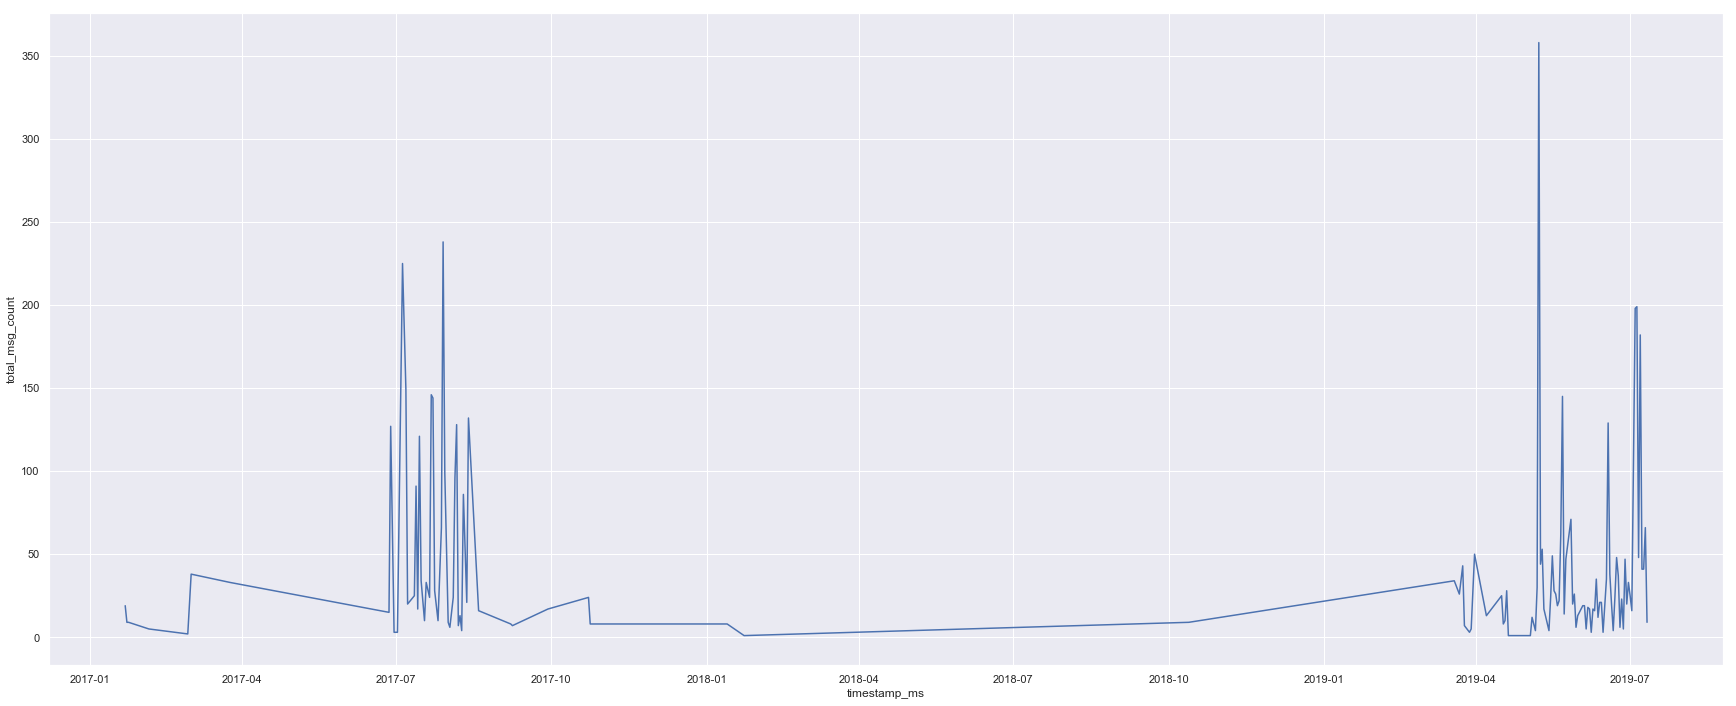

In [11]:
# Plotting daily messages -- Need to clean up the graph
sns.set()
plt.figure(figsize=(30, 12))
sns.lineplot(data = main_text_df_ts.reset_index(), x = 'timestamp_ms', y = 'total_msg_count')

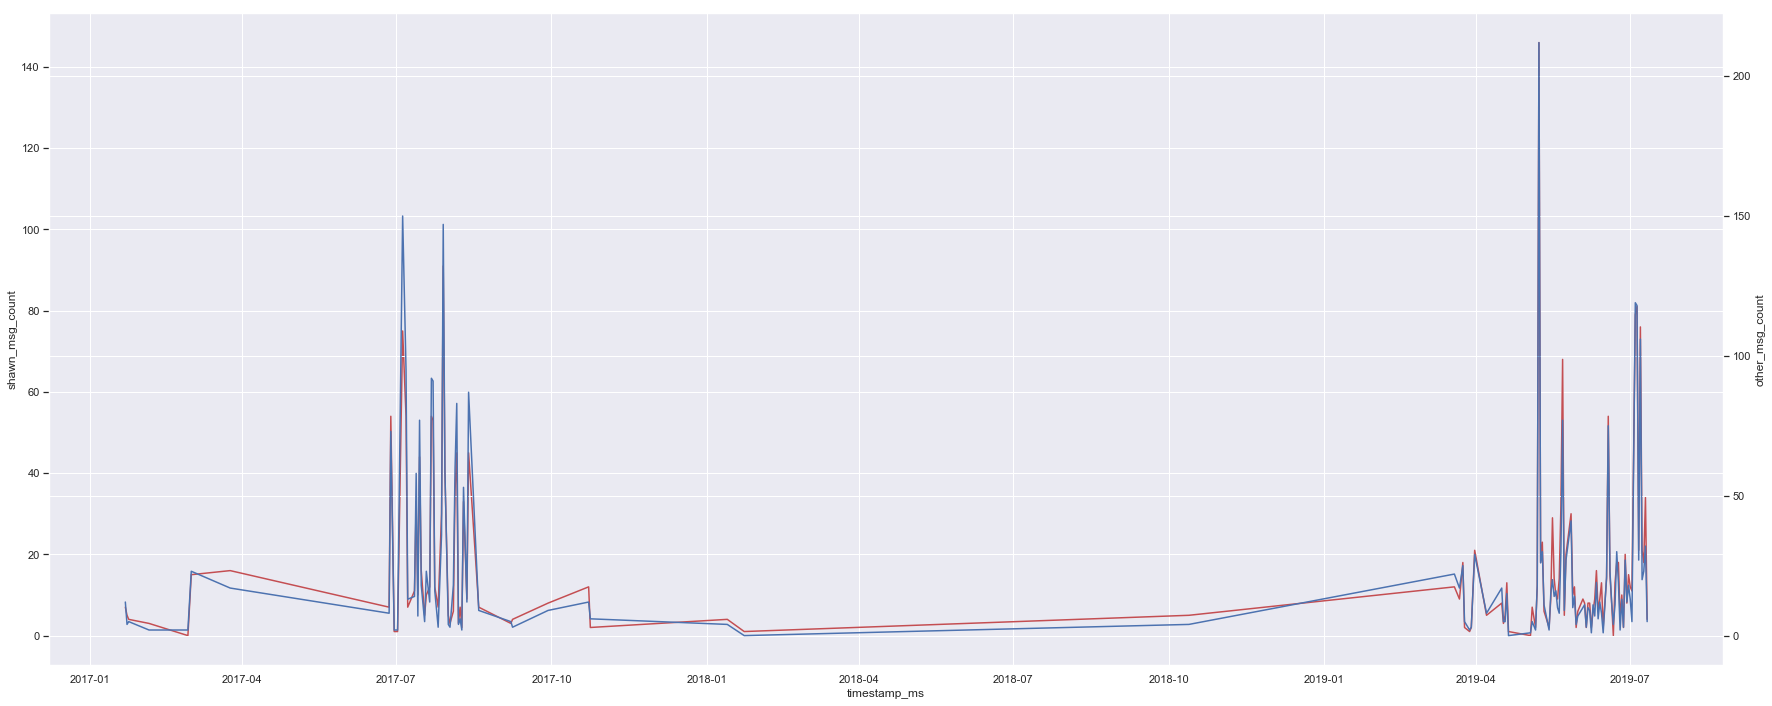

In [12]:
# Plotting by daily messages, seperated by person 
plt.figure(figsize=(30, 12))
sns.lineplot(data = main_text_df_ts.reset_index(), x = 'timestamp_ms', y = 'shawn_msg_count', color = 'r')

ax2 = plt.twinx()
sns.lineplot(data = main_text_df_ts.reset_index(), x = 'timestamp_ms', y = 'other_msg_count', ax = ax2)

In [ ]:
# Weekly and hourly plots

In [ ]:
# Sentiment analysis